<h1>Atividade 2 - Zero reais de funções reais</h1>
<p>O trabalho a seguir visa estudar a eficiencia de metodos interativos </p>

<h2>Item A</h2>




<h2>Metodo da Bissecção</h2>
<p> Este metodo consiste em estimar dois numeros e colocar na função f(x) primeiro verificamos se f(A) * f(B) < 0, pois se essa condição for atendida significa que teremos ao menos uma raiz</p>

In [ ]:
import math
import matplotlib.pyplot as plt


def bisseccao_detalhada(funcao, a, b, tol):
    # Armazena os dados iniciais para o retorno
    dados_iniciais = [a, b]

    # Avaliação inicial usando o parâmetro 'funcao'
    fa = funcao(a)
    fb = funcao(b)

    # Verificação de segurança (Bolzano)
    if fa * fb >= 0:
        return None

    iteracao = 0
    c = 0
    fc = 0

    # O loop continua enquanto o erro (metade do intervalo) for maior que a tolerância
    while (b - a) / 2 > tol:
        iteracao += 1

        c = (a + b) / 2
        fc = funcao(c) # Chamada genérica

        # Lógica de atualização do intervalo
        if fc == 0:
            break

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    # Retorna: [Lista Iniciais], X aprox, f(X), Num Iterações
    return [dados_iniciais, c, fc, iteracao]


o metodo funciona escolhendo um ponto entre A e B, então verificamos se há uma raiz entre A e C ou  C e B, apos descobrirmos selecionaremos um dos intervalos e rodaremos o codigo de volta.

1. Contagem de Operações Aritméticas (do algoritmo)

        c = (a + b) / 2      -> 1 soma, 1 divisão
        erro = (b - a) / 2   -> 1 subtração, 1 divisão
        teste = fa * fc      -> 1 multiplicação
        Total explícito: 5 operações de ponto flutuante
        ops_aritmeticas = 5

2. Avaliações de Função

         Calculamos apenas f(c) novo. Reaproveitamos f(a) ou f(b).
        avaliacoes_funcao = 1


3. Decisões Lógicas

         - while ((b-a)/2 > tol) -> 1 decisão
         - if fc == 0            -> 1 decisão
         - if fa * fc < 0        -> 1 decisão
        decisoes_logicas = 3

       

<h2>Método da Falsa Posição</h2>
<p>Este método funciona de forma similar à bissecção, exigindo que f(A) * f(B) < 0. A diferença é que, em vez de dividir o intervalo ao meio, calculamos o novo ponto traçando uma reta entre f(A) e f(B), o que geralmente encontra a raiz mais rápido.</p>

In [ ]:
def falsa_posicao(funcao, a, b, tol):
    # Armazena os dados iniciais
    dados_iniciais = [a, b]

    fa = funcao(a)
    fb = funcao(b)

    if fa * fb >= 0:
        return None

    iteracao = 0
    c = 0
    fc = 0

    # Loop principal
    while (b - a) > tol:
        iteracao += 1

        # Fórmula da Falsa Posição
        c = (a * fb - b * fa) / (fb - fa)
        fc = funcao(c)

        # Critério de parada extra
        if fc == 0 or abs(fc) < tol:
            break

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return [dados_iniciais, c, fc, iteracao]


[[1, 2], 1.4473570678005703, -3.638758569463052e-05, 6]


O método funciona traçando uma reta entre os pontos $(A, f(A))$ e $(B, f(B))$. O ponto onde essa reta cruza o eixo X é escolhido como o novo ponto C. Em seguida, verificamos o sinal e selecionamos o novo intervalo, assim como na bissecção, mas com uma convergência geralmente mais rápida.
1. Contagem de Operações Aritméticas (do algoritmo)    
```
c = (a*fb - b*fa) / (fb-fa)  -> 2 mult, 2 sub, 1 divisão
erro = b - a                 -> 1 subtração
teste = fa * fc              -> 1 multiplicação
Total explícito: 7 operações de ponto flutuante
ops_aritmeticas = 7
```
2. Avaliações de Função
```
Calculamos apenas f(c) novo. Reaproveitamos f(a) ou f(b) das iterações anteriores.
    avaliacoes_funcao = 1
```
3. Decisões Lógicas
```   
while (b - a > tol)       -> 1 decisão
if fc == 0 (ou < tol)     -> 1 decisão
if fa * fc < 0            -> 1 decisão
decisoes_logicas = 3
```

<h2>Método do Ponto Fixo</h2>
<p>Diferente dos anteriores, este método não usa um intervalo, mas sim um único chute inicial x0. Reescrevemos a função original para a forma x = ϕ(x) e geramos novos valores iterativamente, onde o resultado de uma iteração se torna a entrada da próxima, até que o valor se estabilize.</p>

In [ ]:
def ponto_fixo(funcao_phi, funcao_f, x0, tol):
    # Armazena os dados iniciais
    dados_iniciais = [x0]

    iteracao = 0
    x_antigo = x0
    x_novo = 0
    erro = tol + 1.0

    while erro > tol:
        iteracao += 1

        # Usa a função phi passada por parâmetro
        x_novo = funcao_phi(x_antigo)

        erro = abs(x_novo - x_antigo)

        x_antigo = x_novo

        if iteracao > 1000:
            break

    # Usa a função f passada por parâmetro para o relatório final
    return [dados_iniciais, x_novo, funcao_f(x_novo), iteracao]

O método funciona aplicando repetidamente a fórmula de iteração $x_{novo} = \phi(x_{antigo})$. A cada passo, o valor calculado serve como entrada para o próximo cálculo (retroalimentação), convergindo para a raiz quando a diferença entre dois passos consecutivos se torna insignificante (menor que a tolerância).
1. Contagem de Operações Aritméticas (do algoritmo)
```
x_novo = cos(x) - e**(-x**2) + x  -> 1 cos, 1 exp, 1 pot, 1 neg, 1 sub, 1 soma
erro = |x_novo - x_antigo|        -> 1 subtração, 1 valor absoluto
Total explícito: 8 operações (incluindo funções transcendentais)
ops_aritmeticas = 8
```
2. Avaliações de Função
```
Calculamos apenas phi(x) uma vez por ciclo.
avaliacoes_funcao = 1
```
3. Decisões Lógicaswhile
```
(erro > tol)      -> 1 decisão
if iteracao > 1000      -> 1 decisão (trava de segurança)
decisoes_logicas = 2
```

<h2>Método de Newton-Raphson</h2>
<p>Este método utiliza a derivada da função, f'(x), para determinar a inclinação da curva no ponto atual. A cada iteração, traça-se uma reta tangente; o ponto onde essa reta cruza o eixo X torna-se a nova estimativa, resultando geralmente em uma convergência muito mais rápida que os métodos anteriores.</p>

In [ ]:
def newton_raphson(funcao, derivada, x0, tol):
    # Armazena os dados iniciais
    dados_iniciais = [x0]

    iteracao = 0
    x_atual = x0
    x_novo = 0
    erro = tol + 1.0

    while erro > tol:
        iteracao += 1

        fx = funcao(x_atual)
        dfx = derivada(x_atual)

        # Proteção contra divisão por zero
        if dfx == 0:
            break

        # Fórmula de Newton
        x_novo = x_atual - (fx / dfx)

        erro = abs(x_novo - x_atual)
        x_atual = x_novo

        if iteracao > 100:
            break

    # Retorna: [Lista Iniciais], X aprox, f(X), Num Iterações
    return [dados_iniciais, x_atual, funcao(x_atual), iteracao]



O método funciona calculando a reta tangente à curva no ponto $(x_i, f(x_i))$. A interseção dessa reta com o eixo X fornece uma nova estimativa para a raiz. Matematicamente, isso é feito subtraindo a razão entre a função e sua derivada do valor atual. É conhecido por sua convergência quadrática (muito rápida) quando próximo da raiz.
1. Contagem de Operações Aritméticas (do algoritmo)
```
x_novo = x_atual - (fx / dfx) -> 1 divisão, 1 subtração
erro = |x_novo - x_atual|     -> 1 subtração, 1 valor absoluto
Total explícito: 3 operações de ponto flutuante (estrutura leve)
ops_aritmeticas = 3
```
2. Avaliações de FunçãoCalculamos
```
f(x) e f'(x) (derivada) a cada passo.
avaliacoes_funcao = 2
```
3. Decisões Lógicas
```
while (erro > tol)      -> 1 decisão
if dfx == 0             -> 1 decisão (proteção divisão por zero)
if iteracao > 100       -> 1 decisão (trava de segurança)
decisoes_logicas = 3
```

<h2>Método da Secante</h2>
<p>Este método é uma alternativa ao Newton-Raphson que elimina a necessidade de calcular a derivada analítica f'(x). Ele aproxima a inclinação da tangente usando uma reta secante que passa pelos dois pontos anteriores. Requer dois valores iniciais, mas mantém uma convergência rápida sem exigir a fórmula da derivada.</p>

In [ ]:
def secante(funcao, x0, x1, tol):
    # Armazena os dados iniciais
    dados_iniciais = [x0, x1]

    iteracao = 0
    erro = tol + 1.0

    # Avaliações iniciais usando o parâmetro 'funcao'
    f0 = funcao(x0)
    f1 = funcao(x1)

    while erro > tol:
        iteracao += 1

        denom = f1 - f0

        # Proteção contra divisão por zero
        if denom == 0:
            break

        # Fórmula da Secante
        x_novo = x1 - (f1 * (x1 - x0)) / denom

        erro = abs(x_novo - x1)

        # Atualização para a próxima iteração
        x0 = x1
        f0 = f1

        x1 = x_novo
        f1 = funcao(x_novo) # Única avaliação de função dentro do loop

        if iteracao > 100:
            break

    # Retorna: [Lista Iniciais], X aprox, f(X), Num Iterações
    return [dados_iniciais, x1, f1, iteracao]



O método funciona traçando uma reta secante que passa pelos dois pontos mais recentes da iteração $(x_{i-1}, f(x_{i-1}))$ e $(x_i, f(x_i))$. O ponto onde essa reta cruza o eixo X é usado como a próxima estimativa $x_{i+1}$. É uma aproximação discreta da derivada usada em Newton, evitando o cálculo analítico de $f'(x)$.
1. Contagem de Operações Aritméticas (do algoritmo)
```
denom = f1 - f0                 -> 1 subtração
termo = (f1 * (x1 - x0)) / denom -> 1 sub, 1 mult, 1 div
x_novo = x1 - termo             -> 1 subtração
erro = |x_novo - x1|            -> 1 subtração, 1 valor absoluto
Total explícito: 6 operações de ponto flutuante
ops_aritmeticas = 6
```
2. Avaliações de Função
```
Calculamos apenas f(x_novo) uma vez por ciclo. Os valores anteriores são reutilizados (f0 vira o antigo f1).
avaliacoes_funcao = 1
```
3. Decisões Lógicas
```
while (erro > tol)      -> 1 decisão
if denom == 0           -> 1 decisão (proteção contra divisão por zero)
if iteracao > 100       -> 1 decisão (trava de segurança)
decisoes_logicas = 3
```

Qestão 18

<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-155308002.py:54: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Comparação: $f(x) = e^{-x^2} - \cos(x)$ (intervalo) = (1,2) (Precisão $10^{-4}$)")


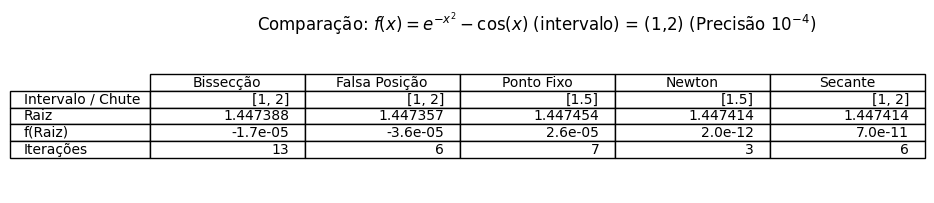

In [ ]:
#dados da questão
ponto_a = 1
ponto_b = 2
precisao = 10**-4
#dados da questão

def f18(x):
    # Função corrigida: e^(-x^2) - cos(x)
    return math.exp(-x**2) - math.cos(x)

# Definimos a função de iteração específica para este método
def phi18(x):
    return math.cos(x) - math.exp(-x**2) + x


# Definimos a derivada separadamente
def df18(x):
    return -2 * x * math.exp(-x**2) + math.sin(x)


bisseccao18 = bisseccao_detalhada(f18, ponto_a, ponto_b, precisao)

resultado_fp18 = falsa_posicao(f18, ponto_a, ponto_b, precisao)

MPF18 = ponto_fixo(phi18, f18, (ponto_a + ponto_b)/2, precisao)

newton18 = newton_raphson(f18, df18, (ponto_a + ponto_b)/2, precisao)

secante18 = secante(f18, ponto_a, ponto_b, precisao)

# --- GERAÇÃO DA TABELA SIMPLES ---

# 1. Agrupando os resultados nas variáveis novas
colunas = ["Bissecção", "Falsa Posição", "Ponto Fixo", "Newton", "Secante"]
linhas = ["Intervalo / Chute", "Raiz", "f(Raiz)", "Iterações"]
todos_resultados = [bisseccao18, resultado_fp18, MPF18, newton18, secante18]

# 2. Formatando o texto das células
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados])
# Linha 1: Raiz (6 casas decimais)
texto_celulas.append([f"{r[1]:.6f}" for r in todos_resultados])
# Linha 2: f(Raiz) (Notação científica simples)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados])

# 3. Plotando
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')
plt.title("Comparação: $f(x) = e^{-x^2} - \cos(x)$ (intervalo) = (1,2) (Precisão $10^{-4}$)")
plt.show()

questão 19

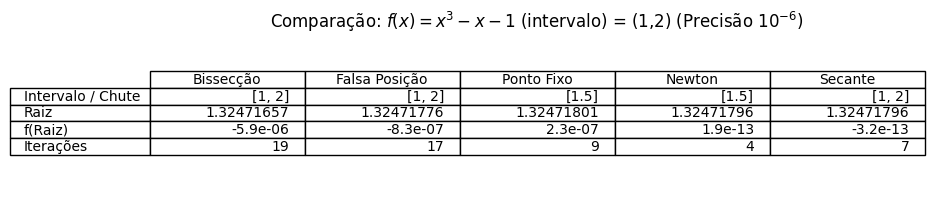

In [ ]:
import math
import matplotlib.pyplot as plt

# --- BLOCO DE DADOS E EXECUÇÃO ---
# dados da questão
ponto_a = 1
ponto_b = 2
precisao = 10**-6  # <--- ALTERADO AQUI
# dados da questão

def f19(x):
    # Função nova: x^3 - x - 1
    return x**3 - x - 1

# Definimos a função de iteração específica (x isolado: x = cubrt(x+1))
def phi19(x):
    return (x + 1)**(1/3)

# Definimos a derivada separadamente: 3x^2 - 1
def df19(x):
    return 3 * x**2 - 1

bisseccao19 = bisseccao_detalhada(f19, ponto_a, ponto_b, precisao)

resultado_fp19 = falsa_posicao(f19, ponto_a, ponto_b, precisao)

MPF19 = ponto_fixo(phi19, f19, (ponto_a + ponto_b)/2, precisao)

newton19 = newton_raphson(f19, df19, (ponto_a + ponto_b)/2, precisao)

secante19 = secante(f19, ponto_a, ponto_b, precisao)


# --- GERAÇÃO DA TABELA SIMPLES ---

# 1. Agrupando os resultados nas variáveis novas
colunas = ["Bissecção", "Falsa Posição", "Ponto Fixo", "Newton", "Secante"]
linhas = ["Intervalo / Chute", "Raiz", "f(Raiz)", "Iterações"]
todos_resultados_19 = [bisseccao19, resultado_fp19, MPF19, newton19, secante19]

# 2. Formatando o texto das células
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados_19])
# Linha 1: Raiz (Aumentei para 8 casas para visualizar melhor a precisão extra)
texto_celulas.append([f"{r[1]:.8f}" for r in todos_resultados_19])
# Linha 2: f(Raiz) (Notação científica simples)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados_19])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados_19])

# 3. Plotando
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')

plt.title("Comparação: $f(x) = x^3 - x - 1$ (intervalo) = (1,2) (Precisão $10^{-6}$)")
plt.show()

questão 20

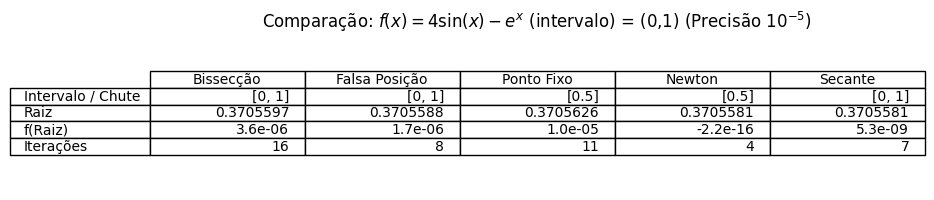

In [ ]:
# --- BLOCO DE DADOS E EXECUÇÃO ---
# dados da questão
ponto_a20 = 0
ponto_b20 = 1
precisao = 10**-5
# dados da questão

def f20(x):
    # Função: 4sen(x) - e^x
    return 4 * math.sin(x) - math.exp(x)

# Definimos a função de iteração específica: x = arcsin(e^x / 4)
def phi20(x):
    # Isolamos o x dentro do seno
    return math.asin(math.exp(x) / 4)

# Definimos a derivada separadamente: 4cos(x) - e^x
def df20(x):
    return 4 * math.cos(x) - math.exp(x)

# Executando os métodos (presumindo que as funções 'engine' já estão na memória)
bisseccao20 = bisseccao_detalhada(f20, ponto_a20, ponto_b20, precisao)

resultado_fp20 = falsa_posicao(f20, ponto_a20, ponto_b20, precisao)

MPF20 = ponto_fixo(phi20, f20, (ponto_a20 + ponto_b20)/2, precisao)

newton20 = newton_raphson(f20, df20, (ponto_a20 + ponto_b20)/2, precisao)

secante20 = secante(f20, ponto_a20, ponto_b20, precisao)


# --- GERAÇÃO DA TABELA ---

# 1. Agrupando os resultados
colunas = ["Bissecção", "Falsa Posição", "Ponto Fixo", "Newton", "Secante"]
linhas = ["Intervalo / Chute", "Raiz", "f(Raiz)", "Iterações"]
todos_resultados_20 = [bisseccao20, resultado_fp20, MPF20, newton20, secante20]

# 2. Formatando o texto das células
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados_20])
# Linha 1: Raiz (7 casas decimais para ver bem a precisão de 10^-5)
texto_celulas.append([f"{r[1]:.7f}" for r in todos_resultados_20])
# Linha 2: f(Raiz) (Notação científica simples)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados_20])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados_20])

# 3. Plotando
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')

# Título formatado com LaTeX
plt.title(r"Comparação: $f(x) = 4\sin(x) - e^x$ (intervalo) = (0,1) (Precisão $10^{-5}$)")
plt.show()

questão 21

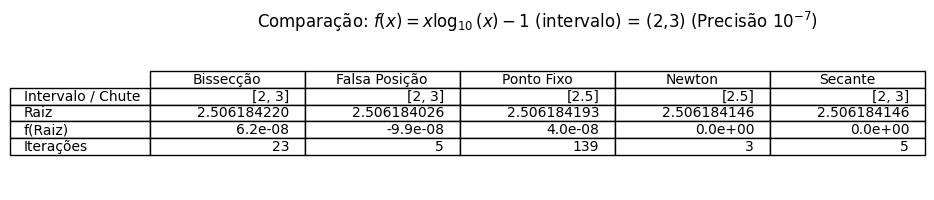

In [ ]:
import math
import matplotlib.pyplot as plt

# --- BLOCO DE DADOS E EXECUÇÃO ---
# dados da questão
ponto_a21 = 2
ponto_b21 = 3
precisao21 = 10**-7
# dados da questão

def f21(x):
    # Função: x * log10(x) - 1
    return x * math.log10(x) - 1

# Definimos a função de iteração específica: x = 10^(1/x)
def phi21(x):
    # Isolamos o x da base do logaritmo (log10(x) = 1/x -> x = 10^(1/x))
    return math.pow(10, 1/x)

# Definimos a derivada separadamente
# f'(x) = 1*log10(x) + x*(1/(x*ln(10))) = log10(x) + 1/ln(10)
def df21(x):
    return math.log10(x) + 1 / math.log(10)

# Executando os métodos
bisseccao21 = bisseccao_detalhada(f21, ponto_a21, ponto_b21, precisao21)

resultado_fp21 = falsa_posicao(f21, ponto_a21, ponto_b21, precisao21)

MPF21 = ponto_fixo(phi21, f21, (ponto_a21 + ponto_b21)/2, precisao21)

newton21 = newton_raphson(f21, df21, (ponto_a21 + ponto_b21)/2, precisao21)

secante21 = secante(f21, ponto_a21, ponto_b21, precisao21)


# --- GERAÇÃO DA TABELA ---

# 1. Agrupando os resultados
colunas = ["Bissecção", "Falsa Posição", "Ponto Fixo", "Newton", "Secante"]
linhas = ["Intervalo / Chute", "Raiz", "f(Raiz)", "Iterações"]
todos_resultados_21 = [bisseccao21, resultado_fp21, MPF21, newton21, secante21]

# 2. Formatando o texto das células
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados_21])
# Linha 1: Raiz (9 casas decimais para ver a precisão de 10^-7)
texto_celulas.append([f"{r[1]:.9f}" for r in todos_resultados_21])
# Linha 2: f(Raiz) (Notação científica simples)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados_21])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados_21])

# 3. Plotando
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')

# Título formatado com LaTeX
plt.title(r"Comparação: $f(x) = x \log_{10}(x) - 1$ (intervalo) = (2,3) (Precisão $10^{-7}$)")
plt.show()

questão 22

no proximo metodo podemos notar a ausencia do metodo da bissecção e falsa posição, pois a equação não cruza o eixo X ela apenas o toca, fazendo assim f(a)* f(b) < 0 == False

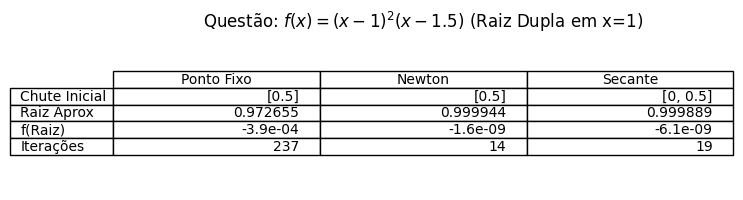

In [ ]:
# --- BLOCO DE DADOS E EXECUÇÃO ---
# dados da questão
ponto_a22 = 0
ponto_b22 = 1.0 # Usando float para garantir contas de ponto flutuante
precisao22 = 10**-4
# dados da questão

def f22(x):
    # Função: (x-1)^2 * (x - 1.5) = x^3 - 3.5x^2 + 4x - 1.5
    return (x - 1)**2 * (x - 1.5)

# Definimos a derivada: 3x^2 - 7x + 4
def df22(x):
    return 3 * x**2 - 7 * x + 4

# Função de iteração para Ponto Fixo
# Isolando o termo 4x: 4x = 1.5 + 3.5x^2 - x^3
def phi22(x):
    return (1.5 + 3.5*x**2 - x**3) / 4

# --- EXECUÇÃO DOS MÉTODOS QUE FUNCIONAM ---

# Newton-Raphson
# Começando no meio (0.5) para não cair direto na raiz 1.0 se usasse b
newton22 = newton_raphson(f22, df22, 0.5, precisao22)

# Secante
# Usamos 0 e 0.5 para ele ter que "caminhar" até a raiz 1.
# Se usássemos 0 e 1, ele acharia em 1 iteração pois f(1)=0.
secante22 = secante(f22, 0, 0.5, precisao22)

# Ponto Fixo
MPF22 = ponto_fixo(phi22, f22, 0.5, precisao22)

# --- GERAÇÃO DA TABELA ---

# 1. Agrupando (Apenas os que funcionam)
colunas = ["Ponto Fixo", "Newton", "Secante"]
linhas = ["Chute Inicial", "Raiz Aprox", "f(Raiz)", "Iterações"]
todos_resultados_22 = [MPF22, newton22, secante22]

# 2. Formatando
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados_22])
# Linha 1: Raiz
texto_celulas.append([f"{r[1]:.6f}" for r in todos_resultados_22])
# Linha 2: f(Raiz)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados_22])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados_22])

# 3. Plotando
fig, ax = plt.subplots(figsize=(8, 2)) # Largura um pouco menor pois tem menos colunas
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')

plt.title(r"Questão: $f(x) = (x-1)^2(x-1.5)$ (Raiz Dupla em x=1)")
plt.show()

<h2>Item B</h2>

<p>Adapte o pseudo código fornecido para resolver o seguinte polinômio.  $$x^5 - 3.7x^4 + 7.4x^3 - 10.8x^2 + 10.8x - 6.8 = 0$$<br>
o intervalo escolhido para isso foi 1,2 a precisão é 10**-6
</p>

<p>Metodo do ponto Fixo</p>

In [ ]:
import math

# Parâmetros
A = 1
B = 2
precisao = 10**-6

# 1. Escolher x0 (Média do intervalo)
x_antigo = (A + B) / 2
x_novo = 0
iteracao = 0

print(f"Iniciando com x0: {x_antigo}")

# 2. Aplicação do metodo
while True:
    iteracao += 1

    # Equação de iteração (Phi) isolando x^5:
    # x = (3.7x^4 - 7.4x^3 + 10.8x^2 - 10.8x + 68)^(1/5)
    x_novo = (3.7 * x_antigo**4 - 7.4 * x_antigo**3 + 10.8 * x_antigo**2 - 10.8 * x_antigo + 6.8)**(1/5)

    # Cálculo do erro absoluto
    erro = abs(x_novo - x_antigo)

    # Atualiza o x para a próxima volta
    x_antigo = x_novo

    # Se o resultado estiver abaixo do erro (Sucesso)
    if erro < precisao:
        break

#3. Caso o limite de 1000 tenha sido atingido (Falha)
if iteracao >= 1000:
    print("Erro: Limite de iterações atingido sem convergência.")

#4. Fim
print(f"\nRaiz aproximada encontrada: {x_novo:.6f}")
print(f"Total de iterações: {iteracao}")

Iniciando com x0: 1.5

Raiz aproximada encontrada: 2.927645
Total de iterações: 29


<p>Metodo da Secante</p>

In [ ]:
# 1. Escolher x0 e x1
# Diferente do Ponto Fixo, a Secante precisa de 2 pontos iniciais.
# Usamos os extremos do intervalo [A, B]
x_antigo = A
x_atual = B
x_novo = 0
iteracao = 0

print(f"Iniciando com x0: {x_antigo} e x1: {x_atual}")

# 2. Aplicação do metodo
while True:
    iteracao += 1

    # Calculamos f(x) diretamente dentro do loop para os dois pontos
    # Equação: x^5 - 3.7x^4 + 7.4x^3 - 10.8x^2 + 10.8x - 68
    f_antigo = x_antigo**5 - 3.7*x_antigo**4 + 7.4*x_antigo**3 - 10.8*x_antigo**2 + 10.8*x_antigo - 6.8
    f_atual  = x_atual**5  - 3.7*x_atual**4  + 7.4*x_atual**3  - 10.8*x_atual**2  + 10.8*x_atual  - 6.8

    # Proteção contra divisão por zero (caso f_atual seja igual a f_antigo)
    if (f_atual - f_antigo) == 0:
        print("Erro: Divisão por zero (reta horizontal).")
        break

    # Fórmula da Secante
    x_novo = x_atual - (f_atual * (x_atual - x_antigo)) / (f_atual - f_antigo)

    # Cálculo do erro
    erro = abs(x_novo - x_atual)

    # Atualiza os pontos para a próxima volta (passo adiante)
    x_antigo = x_atual
    x_atual = x_novo

    # Condicional 1: Se o resultado estiver abaixo do erro (Sucesso)
    if erro < precisao:
        break

# 3. Caso o limite de 1000 tenha sido atingido (Falha)
if iteracao >= 1000:
    print("Erro: Limite de iterações atingido sem convergência.")


#4. fim
print(f"\nRaiz aproximada encontrada: {x_atual:.6f}")
print(f"Total de iterações: {iteracao}")

Comparação dos metodos

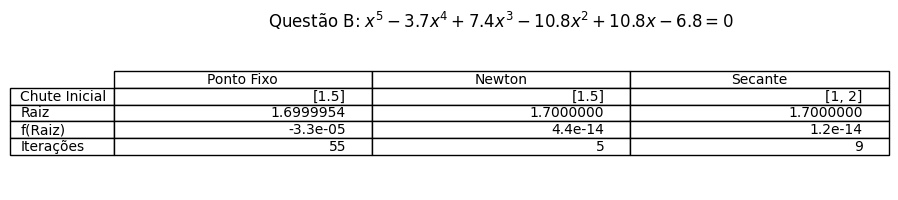

In [ ]:
import math
import matplotlib.pyplot as plt

ponto_aB = 1
ponto_bB = 2
precisaoB = 10**-6
# dados da questão

def fB(x):
    # Função: x^5 - 3.7x^4 + 7.4x^3 - 10.8x^2 + 10.8x - 6.8
    return x**5 - 3.7*x**4 + 7.4*x**3 - 10.8*x**2 + 10.8*x - 6.8

# Função de iteração para Ponto Fixo
# Isolando x^5: x = (3.7x^4 - 7.4x^3 + 10.8x^2 - 10.8x + 6.8)^(1/5)
def phiB(x):
    termo = 3.7*x**4 - 7.4*x**3 + 10.8*x**2 - 10.8*x + 6.8
    # abs(termo) por segurança, mas no intervalo [1,2] é positivo
    return abs(termo)**(1/5)

# Definimos a derivada: 5x^4 - 14.8x^3 + 22.2x^2 - 21.6x + 10.8
def dfB(x):
    return 5*x**4 - 14.8*x**3 + 22.2*x**2 - 21.6*x + 10.8

# --- EXECUÇÃO DOS MÉTODOS ---

# Ponto Fixo (Média do intervalo como chute)
MPFB = ponto_fixo(phiB, fB, (ponto_aB + ponto_bB)/2, precisaoB)

# Newton-Raphson (Média do intervalo como chute)
newtonB = newton_raphson(fB, dfB, (ponto_aB + ponto_bB)/2, precisaoB)

# Secante (Extremos do intervalo como chutes iniciais)
secanteB = secante(fB, ponto_aB, ponto_bB, precisaoB)


# --- GERAÇÃO DA TABELA ---

# 1. Agrupando os resultados
colunas = ["Ponto Fixo", "Newton", "Secante"]
linhas = ["Chute Inicial", "Raiz", "f(Raiz)", "Iterações"]
todos_resultados_B = [MPFB, newtonB, secanteB]

# 2. Formatando o texto das células
texto_celulas = []
# Linha 0: Dados Iniciais
texto_celulas.append([str(r[0]) for r in todos_resultados_B])
# Linha 1: Raiz (7 casas decimais)
texto_celulas.append([f"{r[1]:.7f}" for r in todos_resultados_B])
# Linha 2: f(Raiz) (Notação científica simples)
texto_celulas.append([f"{r[2]:.1e}" for r in todos_resultados_B])
# Linha 3: Iterações
texto_celulas.append([str(r[3]) for r in todos_resultados_B])

# 3. Plotando
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=texto_celulas, colLabels=colunas, rowLabels=linhas, loc='center')

# Título usando LaTeX para a equação
plt.title(r"Questão B: $x^5 - 3.7x^4 + 7.4x^3 - 10.8x^2 + 10.8x - 6.8 = 0$")
plt.show()

<p>Como podemos ver o MPF mostrou baixa eficiência, isso pode ocorrer pois devido ao seu funcionamento, o ponto na inclinação da reta do valor escolhido deve chegar próximo de 1 o que torna a taxa de correção muito lenta, o método da secante mostra uma lentidão maior que o newton tornando assim ele o melhor método nesse caso.</p>